 #  TECHNO HACKS EDUTECH- Virtual Internship 2023

# Name : Prerna Shivdas Dabhade

# Task 2 :- Social media sentiment analysis

Use a dataset that includes information about Twitter,it contains whether the sentiment of the tweets in this set was positive, neutral, or negative for airlines

In [2]:
!pip install contractions
!pip install missingno
!pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import re, string, unicodedata                          
import contractions                                     
from bs4 import BeautifulSoup                           
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import wordcloud
from wordcloud import STOPWORDS
from wordcloud import WordCloud
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


ModuleNotFoundError: No module named 'contractions'

In [ ]:
df = pd.read_csv("D:\Tweets.csv")

In [5]:
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [6]:
texts = [[word.lower() for word in text.split()] for text in df]

In [7]:
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

# **Observations:**

There are 15 columns in the dataset.
Half of the columns have null values. Considering both dependent and independent variables not having any null values, we will not do any null value processing.
Most columns in the dataset are of object type.
airline_sentiment is our dependent / target variable.
text column is our independent variable that we will use for analysis.
All other columns will be dropped at a later stage.

In [9]:
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [10]:
df.isnull().sum() / len(df) * 100

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

<Axes: >

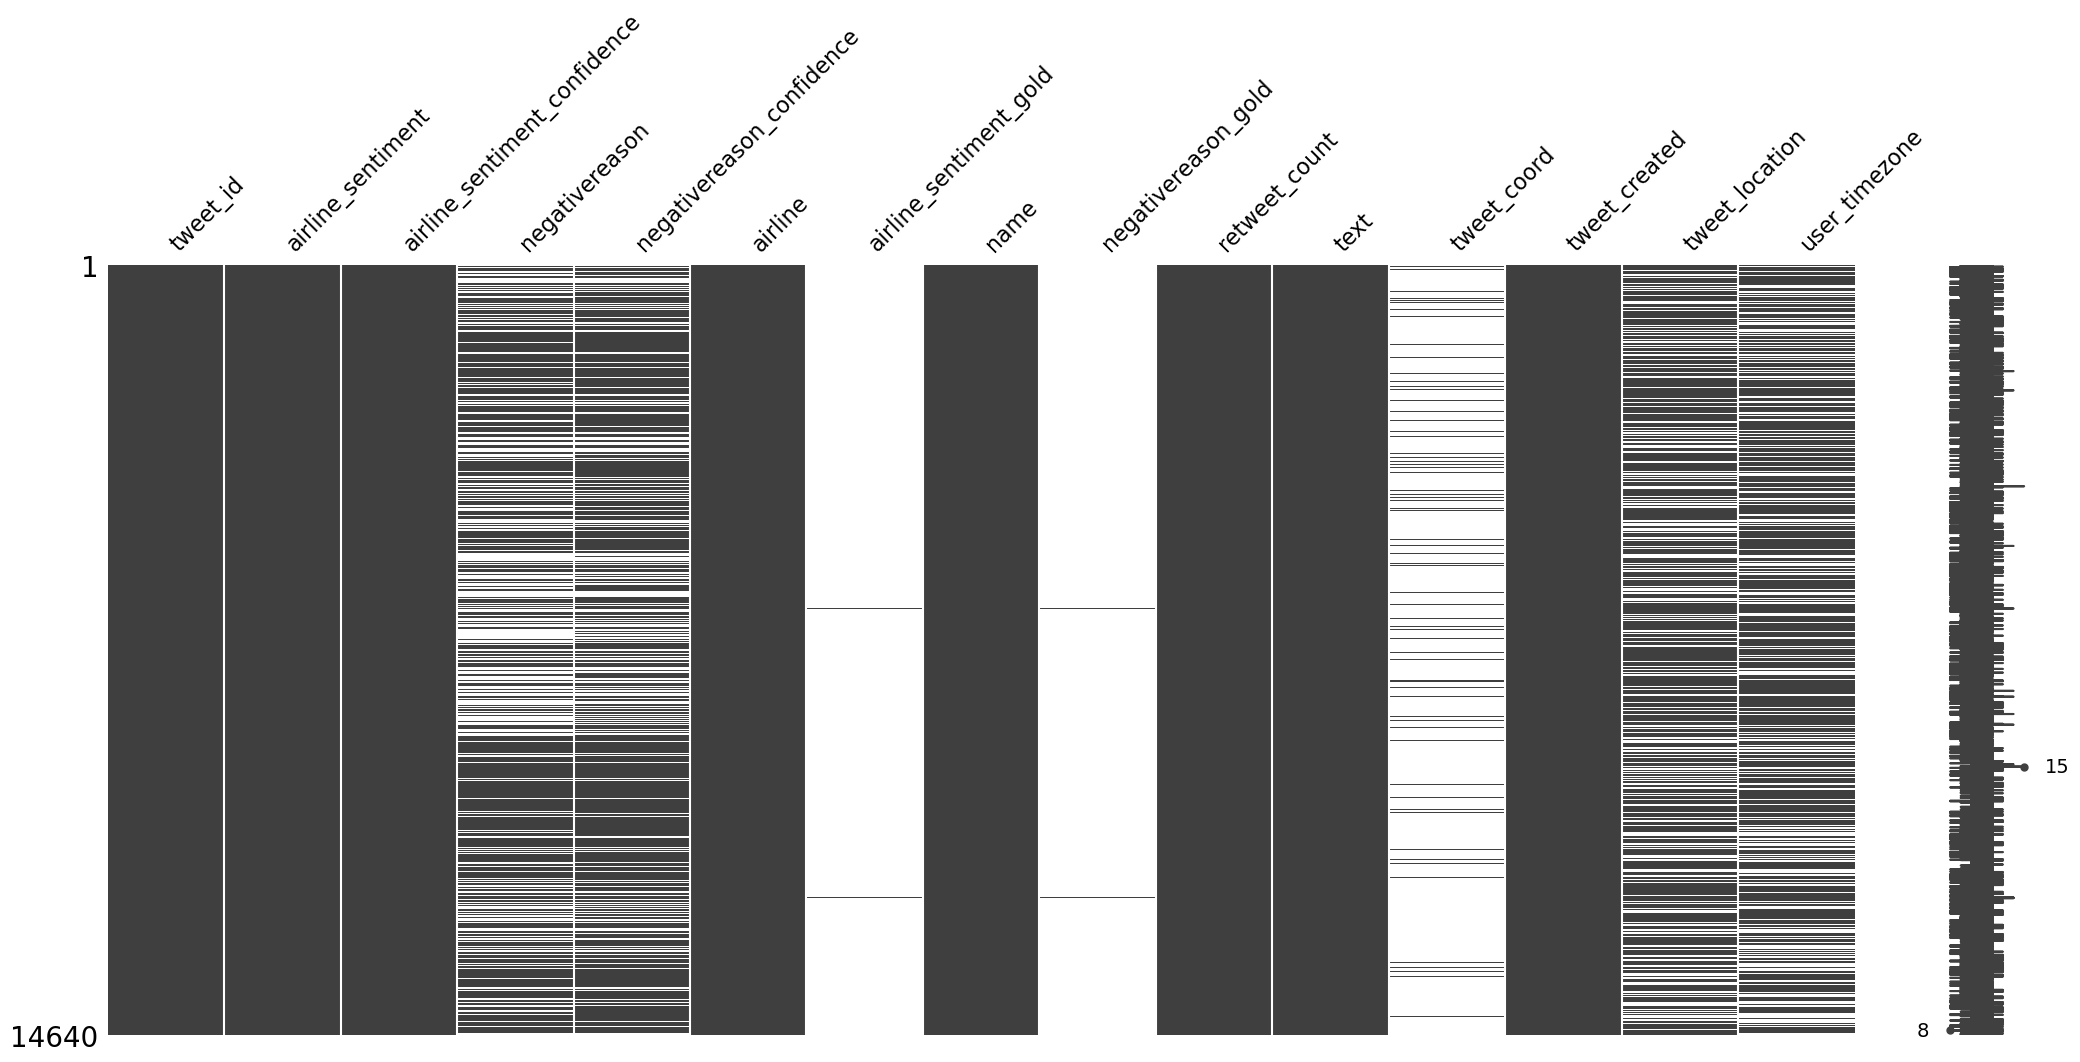

In [11]:
msno.matrix(df)

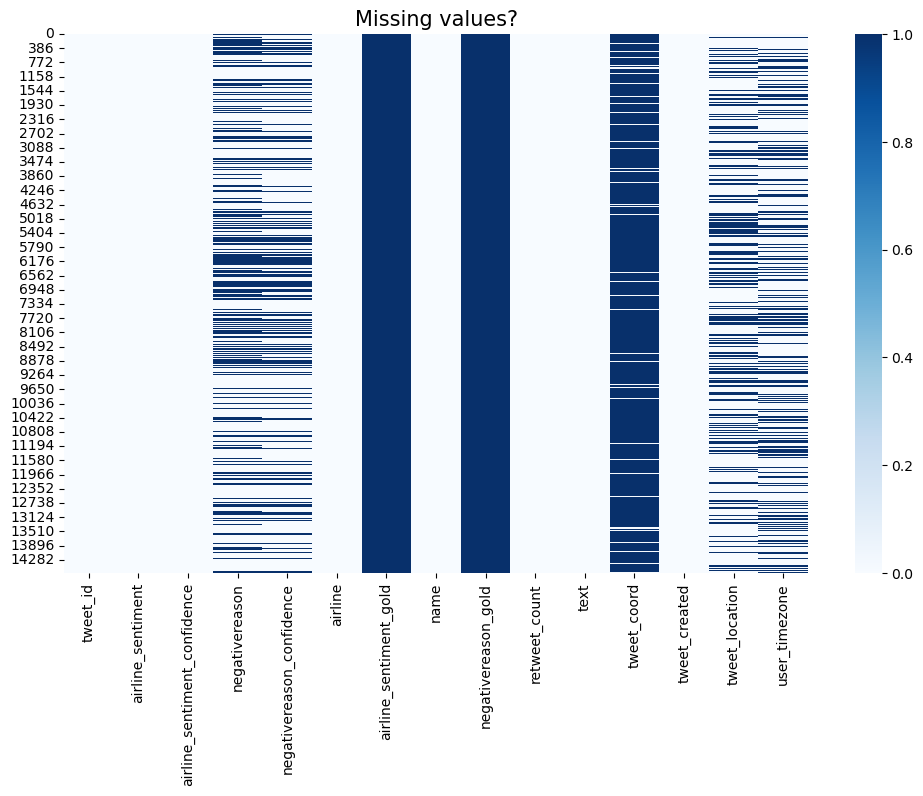

In [12]:
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull(), cmap = "Blues")                       #Visualization of missing value using heatmap
plt.title("Missing values?", fontsize = 15)
plt.show()

**Interestingly, the only non-null values of the _gold columns seems to be the same entries for the most part. Meanwhile, there is some but not total overlap between location and timezone in terms of missing values.**

In [13]:
print("Percentage null or na values in df")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Percentage null or na values in df


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

**airline_sentiment_gold, negativereason_gold** have more than 99% missing data And **tweet_coord** have nearly 93% missing data. It will be better to delete these columns as they will not provide any constructive information

In [14]:
del df["tweet_coord"]
del df["airline_sentiment_gold"]
del df["negativereason_gold"]

In [15]:
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline        name  \
0            NaN                        NaN  Virgin America     cairdin   
1            NaN                     0.0000  Virgin America    jnardino   
2            NaN                        NaN  Virgin America  yvonnalynn   
3     Bad Flight                     0.7033  Virgin America    jnardino   
4     Can't Tell                     1.0000  Virgin America    jnardino   

   retweet_count                                               text  \
0              0                @VirginAmerica What @dhepburn said.   
1              0  @VirginAmerica plus you've added commercials t...   
2              0  @VirginAmerica I didn't today... Must mean I n...   
3              0  @VirginAmerica it's really aggressive to blast...   
4              0  @VirginAmerica and it's a really big bad thing...   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [16]:
freq = df.groupby("negativereason").size()

**we can't fill it will affect in bad way for example we have positive reviwe and we fill the values with mode that means with Customer Service Issue it is missmatch and can be affect on train model so we keep the data as it is.**

In [17]:
# Checking duplicates
df.duplicated().sum()

39

In [18]:
# Dropping duplicates
df.drop_duplicates(inplace = True)

In [19]:
df.duplicated().sum()

0

In [20]:
df.sample(n = 10)

tweet_id airline_sentiment  airline_sentiment_confidence  \
11935  570292715444965377          negative                        1.0000   
10477  569263732280451072          positive                        1.0000   
12295  570240625536323585          negative                        0.6812   
13396  569873418075672576          negative                        1.0000   
10645  569016588411789312          negative                        1.0000   
8965   567588278875213824           neutral                        1.0000   
32     570088404156698625          negative                        1.0000   
8610   568115928044404736          positive                        1.0000   
8304   568502766747971585          positive                        1.0000   
12027  569842758967386112          negative                        1.0000   

               negativereason  negativereason_confidence         airline  \
11935              Bad Flight                     0.6397        American   
10477                     NaN                        NaN      US Airways   
12295            Lost Luggage                     0.3652        American   
13396  Customer Service Issue                     1.0000        American   
10645  Customer Service Issue                     1.0000      US Airways   
8965                      NaN                        NaN           Delta   
32     Customer Service Issue                     1.0000  Virgin America   
8610                      NaN                        NaN           Delta   
8304                      NaN                        NaN           Delta   
12027  Customer Service Issue                     0.9303        American   

                  name  retweet_count  \
11935        alicizzle              0   
10477  MichelleFilling              0   
12295        betorides              0   
13396     ArturoVega67              0   
10645   stephenrodrick              0   
8965       JetBlueNews              0   
32         Cuschoolie1              0   
8610    MaxwellAMooney              0   
8304            bwsf93              0   
12027     flemmingerin              0   

                                                    text  \
11935  @AmericanAir narrowly made standby...lots of s...   
10477  @USAirways Thank you!!! This whole crew has ro...   
12295  @AmericanAir Yes, talked to them. FLL says is ...   
13396    @AmericanAir your call system is a fucking joke   
10645  @USAirways So when was I supposed to call the ...   
8965   @JetBlue's new CEO seeks the right balance to ...   
32     @VirginAmerica help, left expensive headphones...   
8610   @JetBlue friendly, engaging, personable, handl...   
8304   @JetBlue thanks to Julian at login for getting...   
12027  @AmericanAir how can I get you guys to respond...   

                   tweet_created             tweet_location  \
11935  2015-02-24 10:42:33 -0800               MiniApple(s)   
10477  2015-02-21 14:33:44 -0800                        NaN   
12295  2015-02-24 07:15:34 -0800                        NaN   
13396  2015-02-23 06:56:25 -0800  Texas Tech University USA   
10645  2015-02-20 22:11:41 -0800                        NaN   
8965   2015-02-16 23:36:05 -0800                        USA   
32     2015-02-23 21:10:41 -0800              Washington DC   
8610   2015-02-18 10:32:46 -0800             Mill Creek, WA   
8304   2015-02-19 12:09:56 -0800                       NOVA   
12027  2015-02-23 04:54:35 -0800                  San Diego   

                    user_timezone  
11935                         NaN  
10477  Eastern Time (US & Canada)  
12295                       Quito  
13396  Central Time (US & Canada)  
10645                     Arizona  
8965                       Sydney  
32                          Quito  
8610   Pacific Time (US & Canada)  
8304             America/New_York  
12027                         NaN

In [21]:
df.describe().T

count          mean           std  \
tweet_id                      14601.0  5.692156e+17  7.782706e+14   
airline_sentiment_confidence  14601.0  8.999022e-01  1.629654e-01   
negativereason_confidence     10501.0  6.375749e-01  3.303735e-01   
retweet_count                 14601.0  8.280255e-02  7.467231e-01   

                                       min           25%           50%  \
tweet_id                      5.675883e+17  5.685581e+17  5.694720e+17   
airline_sentiment_confidence  3.350000e-01  6.923000e-01  1.000000e+00   
negativereason_confidence     0.000000e+00  3.605000e-01  6.705000e-01   
retweet_count                 0.000000e+00  0.000000e+00  0.000000e+00   

                                       75%           max  
tweet_id                      5.698884e+17  5.703106e+17  
airline_sentiment_confidence  1.000000e+00  1.000000e+00  
negativereason_confidence     1.000000e+00  1.000000e+00  
retweet_count                 0.000000e+00  4.400000e+01

## EDA

In [22]:
df.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
name                             7701
retweet_count                      18
text                            14427
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

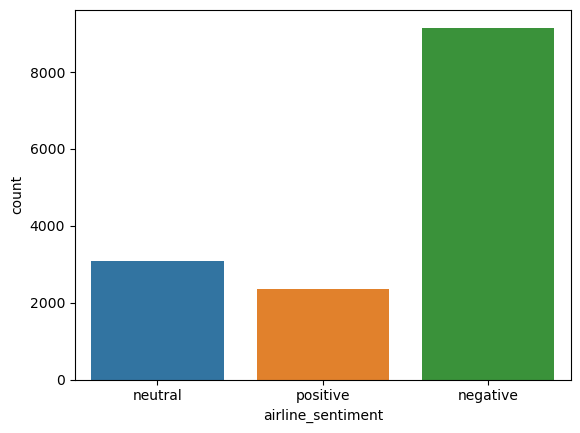

In [23]:
ax = sns.countplot(x = "airline_sentiment", data = df)

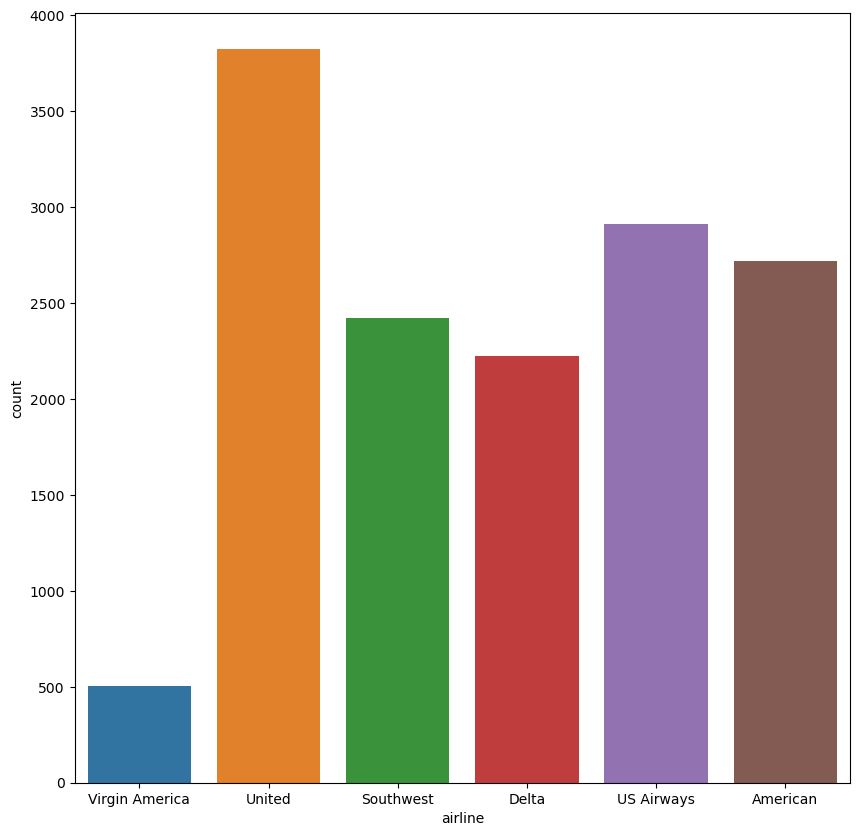

In [24]:
plt.figure(figsize = (10, 10))
ax = sns.countplot(x = "airline", data = df)

## **Stacked bar chart to show the distribution of reviews per company**

In [25]:
import plotly.graph_objects as go
crosstab_sentiments=pd.crosstab(df.airline, df.airline_sentiment)
companies=list(crosstab_sentiments.index)

fig = go.Figure(data=[
    go.Bar(name=col_name, x=companies, y=list(crosstab_sentiments[col_name]))
for col_name in list(crosstab_sentiments.columns)])
# Change the bar mode
fig.update_layout(barmode='stack',
                  title='Sentiment distribution per company',
                  yaxis=dict(title='Sentiment distribution'),
                 xaxis=dict(title='Companies'))
fig.show()

## **Stacked bar chart to show negative reasons distributions per company**

In [26]:
crosstab_neg_reasons = pd.crosstab(df["airline"], df["negativereason"])
companies = list(crosstab_neg_reasons.index)

fig = go.Figure(data = [
    go.Bar(name = col_name, x = companies, y = list(crosstab_neg_reasons[col_name]))
for col_name in list(crosstab_neg_reasons.columns)])

fig.update_layout(barmode = "stack",
                 title = "Negative Reasons Distribution per Company",
                 yaxis = dict(title = "Negative reasons Distribution"),
                 xaxis = dict(title = "Companies"))
fig.show()

## **Pie plot to check the overall distribution for negative reasons**

In [27]:
labels = list(crosstab_neg_reasons.columns)
values = [crosstab_neg_reasons[col_name].sum() for col_name in labels]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title='Overall distribution for negative reasons')
fig.show()

In [28]:
df.drop(df.loc[df["airline_sentiment"] == "neutral"].index, inplace = True)

## Vectorization Process

In [29]:
data = df[
    ["airline_sentiment", "text"]
]
data.head()

airline_sentiment                                               text
1          positive  @VirginAmerica plus you've added commercials t...
3          negative  @VirginAmerica it's really aggressive to blast...
4          negative  @VirginAmerica and it's a really big bad thing...
5          negative  @VirginAmerica seriously would pay $30 a fligh...
6          positive  @VirginAmerica yes, nearly every time I fly VX...

In [30]:
X = df["text"]
y = df["airline_sentiment"]

In [31]:
X

1        @VirginAmerica plus you've added commercials t...
3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
5        @VirginAmerica seriously would pay $30 a fligh...
6        @VirginAmerica yes, nearly every time I fly VX...
                               ...                        
14633    @AmericanAir my flight was Cancelled Flightled...
14634           @AmericanAir right on cue with the delays👌
14635    @AmericanAir thank you we got on a different f...
14636    @AmericanAir leaving over 20 minutes Late Flig...
14638    @AmericanAir you have my money, you change my ...
Name: text, Length: 11510, dtype: object

In [32]:
y

1        positive
3        negative
4        negative
5        negative
6        positive
           ...   
14633    negative
14634    negative
14635    positive
14636    negative
14638    negative
Name: airline_sentiment, Length: 11510, dtype: object

In [33]:
data[data["airline_sentiment"] == "negative"]["text"]

3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
5        @VirginAmerica seriously would pay $30 a fligh...
15           @VirginAmerica SFO-PDX schedule is still MIA.
17       @VirginAmerica  I flew from NYC to SFO last we...
                               ...                        
14631    @AmericanAir thx for nothing on getting us out...
14633    @AmericanAir my flight was Cancelled Flightled...
14634           @AmericanAir right on cue with the delays👌
14636    @AmericanAir leaving over 20 minutes Late Flig...
14638    @AmericanAir you have my money, you change my ...
Name: text, Length: 9157, dtype: object

In [34]:
count_vect = CountVectorizer(stop_words="english")
neg_matrix = count_vect.fit_transform(data[data["airline_sentiment"]=="negative"]["text"])
freqs = zip(count_vect.get_feature_names_out(), neg_matrix.sum(axis=0).tolist()[0])
print(sorted(freqs, key=lambda x: -x[1])[:100])

[('flight', 2937), ('united', 2899), ('usairways', 2375), ('americanair', 2089), ('southwestair', 1214), ('jetblue', 1051), ('cancelled', 921), ('service', 746), ('hours', 646), ('just', 622), ('help', 618), ('hold', 611), ('customer', 609), ('time', 596), ('plane', 530), ('delayed', 505), ('amp', 503), ('hour', 452), ('flightled', 445), ('http', 436), ('flights', 419), ('bag', 415), ('gate', 410), ('ve', 398), ('don', 388), ('late', 377), ('need', 373), ('phone', 367), ('waiting', 341), ('thanks', 315), ('got', 298), ('airline', 294), ('like', 291), ('trying', 288), ('delay', 272), ('wait', 272), ('today', 269), ('minutes', 266), ('day', 251), ('going', 249), ('bags', 245), ('luggage', 245), ('told', 245), ('airport', 244), ('people', 242), ('worst', 241), ('fly', 237), ('really', 236), ('did', 227), ('guys', 224), ('weather', 224), ('lost', 221), ('agent', 218), ('hrs', 217), ('way', 212), ('make', 211), ('change', 210), ('seat', 208), ('flighted', 205), ('want', 205), ('check', 204)

## Wordcloud for Positive Reasons

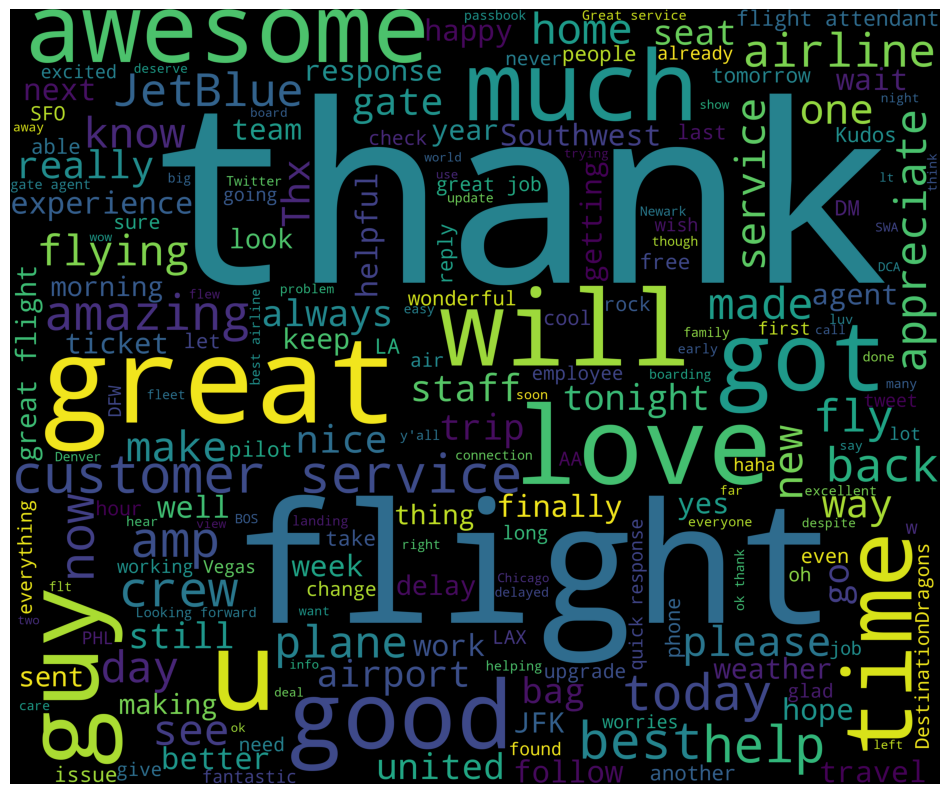

In [35]:
new_df = data[data["airline_sentiment"] == "positive"]
words = " ".join(new_df["text"])
cleaned_word = " ".join([word for word in words.split() if "http" not in word and not word.startswith("@") and word != "RT"])
wordcloud = WordCloud(stopwords = STOPWORDS,
                     background_color = "black", width = 3000, height = 2500).generate(cleaned_word)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Wordcloud for Negative Reasons

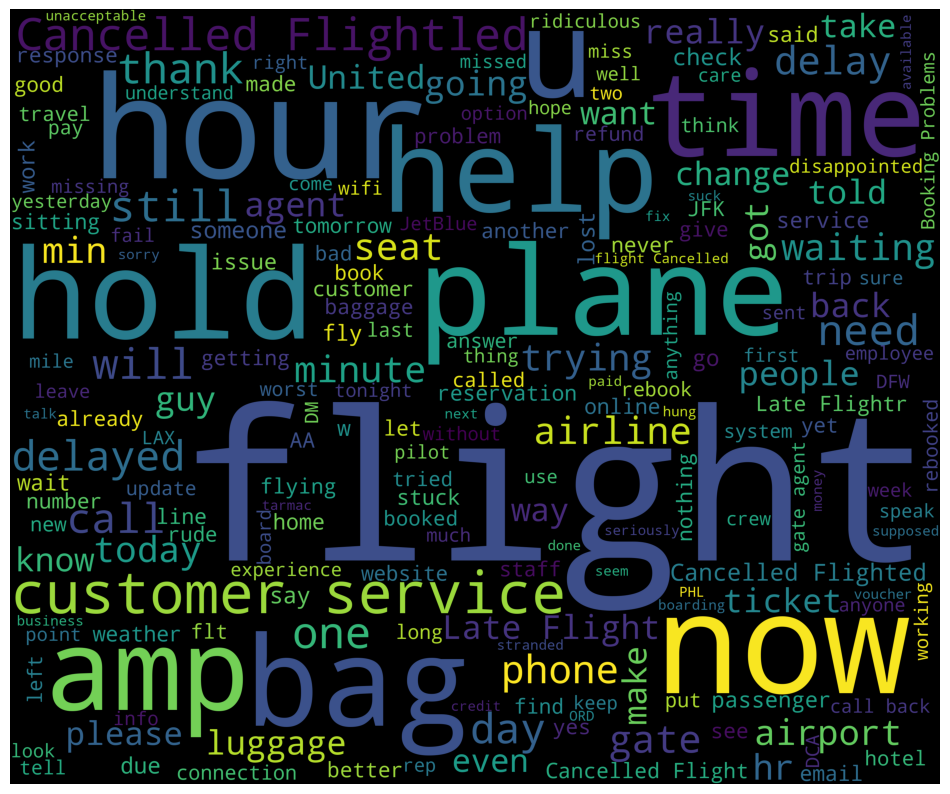

In [36]:
new_df = data[data["airline_sentiment"] == "negative"]
words = " ".join(new_df["text"])
cleaned_word = " ".join([word for word in words.split() if "http" not in word and not word.startswith("@") and word != "RT"])
wordcloud = WordCloud(stopwords = STOPWORDS,
                     background_color = "black", width = 3000, height = 2500).generate(cleaned_word)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Conclusions

* **As we you can see above we have WordCloud for negative sentiments and postive sentiments.
* **The positive sentiments are love,great,thank,amazing,good,...,etc.
* **The negative sentiments are flight,need,bag,left,customer service,help,plane,..,etc.


# Thank you!